In [341]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [342]:
ATTACK_TARGET = "09"
MAIN = False # True: メインの攻撃, False: 予備選の攻撃

DIR = "../data" if MAIN else "../predata/anonymization_data"

"""
01	宮地研.exe
02	私達日本語本当下手
03	ポップコーン
04	Hots
05	SHA-NES
06	神ぼ大νττ
07	たけのこ映画守り隊
08	0xA
09	ステテコ泥棒
10	動的計画法
11	Gunmataro117
12	HAL
14	privocy
15	ES5 →多数決で陥落？
16	佐古研究室
17	こそっとアタック、しれっとブロック
18	匿名アノニマス
19	RITCHEY
20	KAT-TUNE
21	PR.AVATECT
22	春日部防衛隊（かすかべ防衛隊）
"""

'\n01\t宮地研.exe\n02\t私達日本語本当下手\n03\tポップコーン\n04\tHots\n05\tSHA-NES\n06\t神ぼ大νττ\n07\tたけのこ映画守り隊\n08\t0xA\n09\tステテコ泥棒\n10\t動的計画法\n11\tGunmataro117\n12\tHAL\n14\tprivocy\n15\tES5 →多数決で陥落？\n16\t佐古研究室\n17\tこそっとアタック、しれっとブロック\n18\t匿名アノニマス\n19\tRITCHEY\n20\tKAT-TUNE\n21\tPR.AVATECT\n22\t春日部防衛隊（かすかべ防衛隊）\n'

In [343]:
# fmt: off
ALL_HEADER = ['Name', 'Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '247', '260', '653', '673', '810', '885',  # noqa: E501
                      '1009', '1073', '1097', '1126', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017',  # noqa: E501
                      '2021', '2043', '2086', '2087', '2093', '2100', '2105', '2138', '2143', '2174', '2193', '2253',  # noqa: E501
                      '2399', '2628', '2797', '2872', '2968', '3393', '3438', '3439', '3440', '3466', '3479', '3489',  # noqa: E501
                      '3877', '3889'] # noqa

B_HEADERS_LIST = [
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '653', '1525', '2105', '2193', '2253', '2628', '2872', '3438', '3439', '3440', '3877', '3889'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '260', '653', '673', '1009', '1073', '1525', '1750', '1881', '1967', '2043', '2093', '2105', '2143', '2193', '2399', '2628', '2968', '3479', '3489', '3877', '3889'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '673', '1881', '1920', '2087', '2138'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '673', '810', '885', '1009', '1073', '1097', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2043', '2087', '2093', '2138', '2399', '3438', '3439', '3440'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '673', '810', '1073', '1126', '1702', '2100', '2174', '2253', '2797', '3393', '3466'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '885', '1097', '1654', '2086', '2138', '2872'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '2100', '2143', '2872', '3479'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '1097', '1750', '2021', '2093', '2105', '2628', '2968'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '1920', '2017', '2087'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '1097', '2628', '2174', '2797', '1073', '2100', '2968', '2105', '2193'],  # noqa: E501
]

B_USER_ATTRIBUTE_HEADERS = ['Gender', 'Age', 'Occupation', 'ZIP-code']

B_REVIEW_HEADERS_LIST = [
  ['260', '653', '1525', '2105', '2193', '2253', '2628', '2872', '3438', '3439', '3440', '3877', '3889'],  # noqa: E501
  ['2', '56', '260', '653', '673', '1009', '1073', '1525', '1750', '1881', '1967', '2043', '2093', '2105', '2143', '2193', '2399', '2628', '2968', '3479', '3489', '3877', '3889'],  # noqa: E501
  ['673', '1881', '1920', '2087', '2138'],  # noqa: E501
  ['2', '56', '673', '810', '885', '1009', '1073', '1097', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2043', '2087', '2093', '2138', '2399', '3438', '3439', '3440'],  # noqa: E501
  ['673', '810', '1073', '1126', '1702', '2100', '2174', '2253', '2797', '3393', '3466'],  # noqa: E501
  ['247', '885', '1097', '1654', '2086', '2138', '2872'],  # noqa: E501
  ['247', '2100', '2143', '2872', '3479'],  # noqa: E501
  ['260', '1097', '1750', '2021', '2093', '2105', '2628', '2968'],  # noqa: E501
  ['247', '1920', '2017', '2087'],  # noqa: E501
  ['260', '1097', '2628', '2174', '2797', '1073', '2100', '2968', '2105', '2193'],  # noqa: E501
]

MOVIE_IDS = ['2', '56', '247', '260', '653', '673', '810', '885', '1009', '1073', '1097', '1126', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2021', '2043', '2086', '2087', '2093', '2100', '2105', '2138', '2143', '2174', '2193', '2253', '2399', '2628', '2797', '2872', '2968', '3393', '3438', '3439', '3440', '3466', '3479', '3489', '3877', '3889']
# fmt: on

### Cデータの読み取り

In [344]:
from os import listdir

#c0~c9に対するdfのリスト
c_data_list = []

files = listdir(DIR)

for i in range(10):
    file = None
    for f in files:
        if f.startswith(f"C{ATTACK_TARGET}_{i}"):
            file = f
            break
    if file is None:
        print(f)
        raise("File not found")
    c_data = pd.read_csv(f"{DIR}/C{ATTACK_TARGET}_{i}.csv")
    c_data_list.append(c_data)

c_data_list[0]

,Gender,Age,Occupation,ZIP-code,260,653,1525,2105,2193,2253,2628,2872,3438,3439,3440,3877,3889
0,F,25,14,549,1,0,5,2,0,1,0,1,3,4,5,2,4
1,M,45,5,616,3,0,0,4,4,0,2,5,0,0,0,0,0
2,F,35,20,346,5,5,2,2,1,4,1,4,4,2,3,2,4
3,F,18,9,685,5,4,2,1,0,5,0,1,1,4,4,1,3
4,F,56,9,489,1,0,2,4,5,5,0,4,3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,25,4,417,5,2,0,5,3,0,4,0,0,3,0,0,0
9996,M,18,12,985,2,0,0,2,0,0,2,4,4,3,2,2,0
9997,M,25,15,441,2,1,1,2,0,0,0,1,0,5,0,4,0
9998,M,50,3,597,4,1,0,5,4,0,4,2,0,1,0,3,2


### Ba, Bbの読み込み

In [345]:
Ba = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}a.csv")
Ba.head()

,Name,Gender,Age,Occupation,ZIP-code
0,Isadore Ell,M,50,11,474
1,Tito Fowden,M,56,15,40
2,Letizia Grabham,F,18,17,339
3,Thorvald Le Count,M,25,18,41
4,Xavier Vallentine,M,18,0,756


In [346]:
Bb = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}b.csv")
Bb.head()

,2,56,247,260,653,673,810,885,1009,1073,...,2968,3393,3438,3439,3440,3466,3479,3489,3877,3889
0,0,4,0,5,5,4,0,5,2,2,...,0,*,1,0,1,0,4,0,2,3
1,*,0,4,0,0,2,3,0,4,1,...,4,1,0,5,0,4,0,0,5,0
2,4,0,2,1,5,4,1,2,4,2,...,0,1,5,5,1,3,3,0,5,4
3,0,2,1,2,1,0,0,1,5,0,...,0,0,4,0,3,0,0,1,4,0
4,2,4,3,4,2,0,3,5,0,0,...,1,1,0,1,*,1,1,5,2,0


### 攻撃に利用するGAOZと映画のIDの全ペア

In [347]:
import itertools

cross_tab_pairs = []

pairs_set = set()
for b_review_headers in B_REVIEW_HEADERS_LIST:
    for pair in itertools.combinations(b_review_headers, 2):
        pairs_set.add(pair)

for pair in itertools.combinations(MOVIE_IDS, 2):
    if pair in pairs_set:
        cross_tab_pairs.append(pair)

print(f"ペアの数: {len(cross_tab_pairs)}")
cross_tab_pairs[:5]

ペアの数: 607


[('2', '56'), ('2', '260'), ('2', '653'), ('2', '673'), ('2', '810')]

### C0~C9の各cross集計の平均をとる

In [348]:
# 1. c0からc9までのデータを結合
combined_data = pd.concat(c_data_list, ignore_index=True)
combined_data.astype("category")
for col in MOVIE_IDS:
    combined_data[col] = pd.Categorical(combined_data[col], categories=[0, 1, 2, 3, 4, 5], ordered=True)


# 2. cross_tab_pairsごとにクロス集計を行う
cross_tabs = {}
for movie_id_i, movie_id_j in cross_tab_pairs:
    cross_tab = pd.crosstab(combined_data[movie_id_i], combined_data[movie_id_j], normalize='all')
    cross_tabs[(movie_id_i, movie_id_j)] = cross_tab

cross_tabs[cross_tab_pairs[1]]

260,0,1,2,3,4,5
2,,,,,,
0,0.0321,0.0376,0.0295,0.0511,0.0526,0.1287
1,0.0137,0.0185,0.0136,0.0205,0.0235,0.0412
2,0.0079,0.0129,0.0085,0.0121,0.0133,0.0264
3,0.0158,0.0216,0.0155,0.0254,0.0235,0.0546
4,0.0123,0.0174,0.0130,0.0205,0.0198,0.0423
5,0.0195,0.0201,0.0164,0.0279,0.0288,0.0619


### C0~C9の各cross集計の平均の可視化

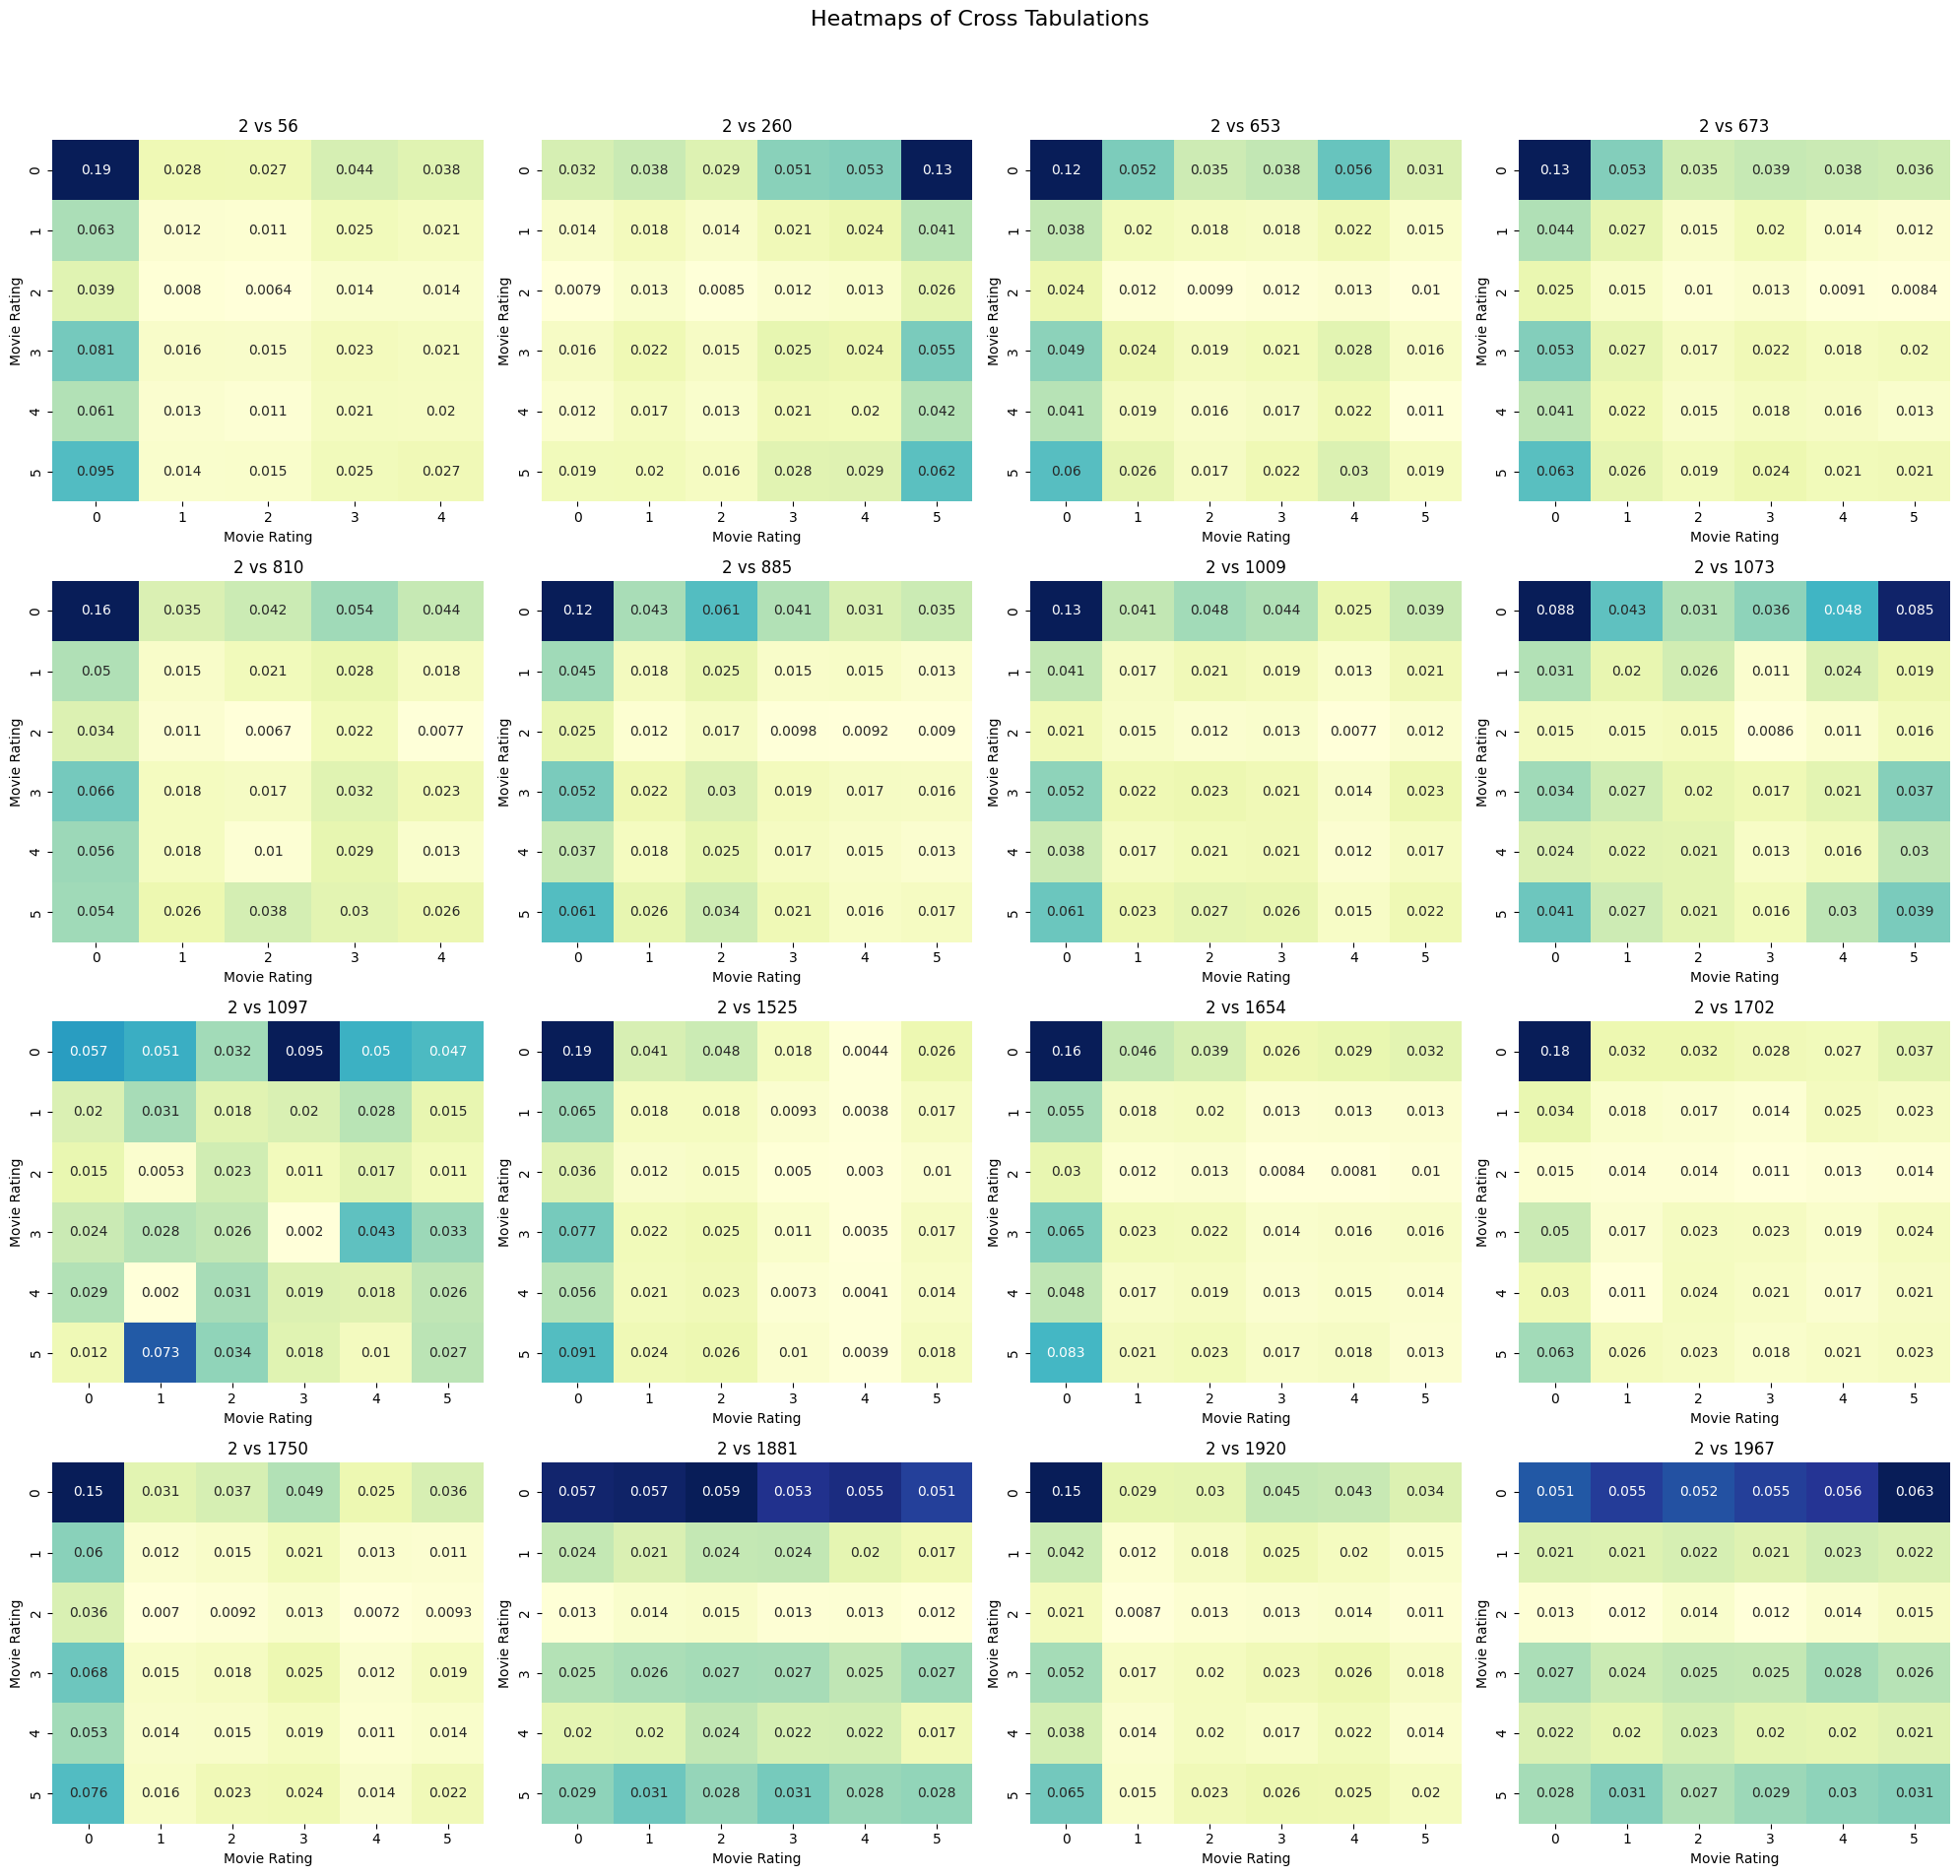

Total number of cross tabulations: 607


In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmaps(cross_tabs, num_plots=12):
    num_rows = (num_plots + 3) // 4  # 4列で表示するために必要な行数を計算
    fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
    fig.suptitle("Heatmaps of Cross Tabulations", fontsize=16)
    
    axes = np.array(axes).reshape(-1)  # axes を1次元配列に変換

    for i, ((movie_id_i, movie_id_j), cross_tab) in enumerate(list(cross_tabs.items())[:num_plots]):
        ax = axes[i]
        sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', ax=ax, cbar=False)
        ax.set_title(f"{movie_id_i} vs {movie_id_j}")
        ax.set_ylabel("Movie Rating")
        ax.set_xlabel("Movie Rating")

    # 使用していない subplot を削除
    for i in range(num_plots, num_rows * 4):
        fig.delaxes(axes[i])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # suptitle のためのスペースを確保
    plt.show()

# 最初の20個のクロス集計表とそのヒートマップを表示
plot_heatmaps(cross_tabs, num_plots=16)

# クロス集計表の数を表示
print(f"Total number of cross tabulations: {len(cross_tabs)}")

### Bbの特定の行の各映画のReviewごとのGAOZの確率の試算

In [350]:
# Bbの指定した行を取得
target_Bb_row_index = 0
target_Bb_row = Bb.iloc[target_Bb_row_index]
target_Bb_row[:5]

2      0
56     4
247    0
260    5
653    5
Name: 0, dtype: object

In [351]:
hidden_movie_id = None
for movie_id in MOVIE_IDS:
    if target_Bb_row[movie_id] == "*":
        hidden_movie_id = movie_id
        break
hidden_movie_id

'3393'

In [352]:
# TODO:　ここの実装が複雑なので後ほど問題ないか確認する
# 各映画IDに対する target_cross を格納するリスト
cross_tabs_with_hidden_movie = []

for movie_id_i, movie_id_j in cross_tab_pairs:
    if hidden_movie_id not in (movie_id_i, movie_id_j):
        continue
    cross_tab = cross_tabs[(movie_id_i, movie_id_j)]
    if hidden_movie_id == movie_id_j:
        # 2143       0       1       2       3       4       5
        # 2                                                   
        # 0     0.1678  0.0290  0.0415  0.0272  0.0413  0.0268
        # 1     0.0406  0.0176  0.0188  0.0116  0.0204  0.0140
        # 2     0.0215  0.0102  0.0126  0.0108  0.0154  0.0095
        # 3     0.0546  0.0173  0.0233  0.0163  0.0236  0.0183
        # 4     0.0477  0.0163  0.0201  0.0161  0.0201  0.0164
        # 5     0.0696  0.0184  0.0243  0.0195  0.0240  0.0175
        review_value = target_Bb_row[movie_id_i]
        # print(cross_tab)
        # print(review_value)
        target_cross_tab = cross_tab.loc[int(review_value)]
        # print(target_cross_tab)
        cross_tabs_with_hidden_movie.append(target_cross_tab)
        # break
    elif hidden_movie_id == movie_id_i:
        # 2193       0       1       2       3       4       5
        # 2143
        # 0     0.1756  0.0361  0.0268  0.0579  0.0548  0.0506
        # 1     0.0217  0.0174  0.0117  0.0137  0.0229  0.0214
        # 2     0.0310  0.0208  0.0144  0.0204  0.0292  0.0248
        # 3     0.0230  0.0148  0.0111  0.0134  0.0176  0.0216
        # 4     0.0346  0.0213  0.0155  0.0220  0.0257  0.0257
        # 5     0.0239  0.0133  0.0105  0.0169  0.0198  0.0181
        review_value = target_Bb_row[movie_id_j]
        # print(movie_id_j)
        # print(cross_tab)
        # print(review_value)
        target_cross_tab = cross_tab[int(review_value)]
        # print(target_cross_tab)
        cross_tabs_with_hidden_movie.append(target_cross_tab)
        # print(cross_tab[int(review_value)])

cross_tabs_with_hidden_movie = pd.concat(cross_tabs_with_hidden_movie, axis=1)
cross_tabs_with_hidden_movie

,4,0,2,5,5,4,5,1,0,0
3393,,,,,,,,,,
0,0.0459,0.1998,0.0448,0.0133,0.0373,0.0821,0.0448,0.0409,0.1272,0.3220
1,0.0184,0.0543,0.0298,0.0291,0.0283,0.0254,0.0204,0.0234,0.0370,0.0320
2,0.0155,0.0475,0.0192,0.0073,0.0293,0.0243,0.0203,0.0269,0.0189,0.0445
3,0.0121,0.0315,0.0116,0.0240,0.0193,0.0147,0.0127,0.0140,0.0245,0.0123
4,0.0136,0.0485,0.0174,0.0198,0.0163,0.0218,0.0153,0.0229,0.0137,0.0269
5,0.0100,0.0350,0.0116,0.0217,0.0118,0.0155,0.0115,0.0157,0.0167,0.0149


In [353]:
# 各カラムごとに総和が1になるように確率を正規化
def normalize_columns(df):
    return df.div(df.sum(axis=0), axis=1)

# クロス集計表を列ごとに正規化
normalized_cross_tabs_with_hidden_movie = normalize_columns(cross_tabs_with_hidden_movie)
normalized_cross_tabs_with_hidden_movie

,4,0,2,5,5,4,5,1,0,0
3393,,,,,,,,,,
0,0.397403,0.479597,0.333333,0.115451,0.262122,0.446681,0.3584,0.284423,0.534454,0.711445
1,0.159307,0.130341,0.221726,0.252604,0.198876,0.138194,0.1632,0.162726,0.155462,0.070703
2,0.134199,0.114018,0.142857,0.063368,0.205903,0.132209,0.1624,0.187065,0.079412,0.098321
3,0.104762,0.075612,0.086310,0.208333,0.135629,0.079978,0.1016,0.097357,0.102941,0.027176
4,0.117749,0.116419,0.129464,0.171875,0.114547,0.118607,0.1224,0.159249,0.057563,0.059434
5,0.086580,0.084013,0.086310,0.188368,0.082923,0.084331,0.0920,0.109179,0.070168,0.032921


In [354]:
# # TODO: ここがSUMでいいのかは要検討
hidden_movie_probabilities = normalized_cross_tabs_with_hidden_movie.sum(axis=1)
hidden_movie_probabilities


3393
0    3.923309
1    1.653139
2    1.319752
3    1.019699
4    1.167307
5    0.916794
dtype: float64

In [355]:
hidden_movie_histgram = combined_data[hidden_movie_id].value_counts(normalize=True).sort_index()
hidden_movie_histgram

3393
0    0.4362
1    0.1440
2    0.1354
3    0.0826
4    0.1162
5    0.0856
Name: proportion, dtype: float64

In [356]:
probability = (hidden_movie_probabilities / hidden_movie_histgram).sort_values(ascending=False)
probability

3393
3    12.345024
1    11.480130
5    10.710207
4    10.045672
2     9.747064
0     8.994290
dtype: float64

In [357]:
probability.index[0]

3

In [358]:
# target_Bb_row_index = 0

result_list = []

for target_Bb_row_index in range(50):
    target_Bb_row = Bb.iloc[target_Bb_row_index]
    target_Bb_row[:5]

    hidden_movie_id = None
    for movie_id in MOVIE_IDS:
        if target_Bb_row[movie_id] == "*":
            hidden_movie_id = movie_id
            break
    hidden_movie_id

    # TODO:　ここの実装が複雑なので後ほど問題ないか確認する
    # 各映画IDに対する target_cross を格納するリスト
    cross_tabs_with_hidden_movie = []

    for movie_id_i, movie_id_j in cross_tab_pairs:
        if hidden_movie_id not in (movie_id_i, movie_id_j):
            continue
        cross_tab = cross_tabs[(movie_id_i, movie_id_j)]
        if hidden_movie_id == movie_id_j:
            # 2143       0       1       2       3       4       5
            # 2                                                   
            # 0     0.1678  0.0290  0.0415  0.0272  0.0413  0.0268
            # 1     0.0406  0.0176  0.0188  0.0116  0.0204  0.0140
            # 2     0.0215  0.0102  0.0126  0.0108  0.0154  0.0095
            # 3     0.0546  0.0173  0.0233  0.0163  0.0236  0.0183
            # 4     0.0477  0.0163  0.0201  0.0161  0.0201  0.0164
            # 5     0.0696  0.0184  0.0243  0.0195  0.0240  0.0175
            review_value = target_Bb_row[movie_id_i]
            # print(cross_tab)
            # print(review_value)
            target_cross_tab = cross_tab.loc[int(review_value)]
            # print(target_cross_tab)
            cross_tabs_with_hidden_movie.append(target_cross_tab)
            # break
        elif hidden_movie_id == movie_id_i:
            # 2193       0       1       2       3       4       5
            # 2143
            # 0     0.1756  0.0361  0.0268  0.0579  0.0548  0.0506
            # 1     0.0217  0.0174  0.0117  0.0137  0.0229  0.0214
            # 2     0.0310  0.0208  0.0144  0.0204  0.0292  0.0248
            # 3     0.0230  0.0148  0.0111  0.0134  0.0176  0.0216
            # 4     0.0346  0.0213  0.0155  0.0220  0.0257  0.0257
            # 5     0.0239  0.0133  0.0105  0.0169  0.0198  0.0181
            review_value = target_Bb_row[movie_id_j]
            # print(movie_id_j)
            # print(cross_tab)
            # print(review_value)
            target_cross_tab = cross_tab[int(review_value)]
            # print(target_cross_tab)
            cross_tabs_with_hidden_movie.append(target_cross_tab)
            # print(cross_tab[int(review_value)])

    cross_tabs_with_hidden_movie = pd.concat(cross_tabs_with_hidden_movie, axis=1)
    cross_tabs_with_hidden_movie

    # 各カラムごとに総和が1になるように確率を正規化
    def normalize_columns(df):
        return df.div(df.sum(axis=0), axis=1)

    # クロス集計表を列ごとに正規化
    normalized_cross_tabs_with_hidden_movie = normalize_columns(cross_tabs_with_hidden_movie)
    normalized_cross_tabs_with_hidden_movie

    hidden_movie_probabilities = normalized_cross_tabs_with_hidden_movie.sum(axis=1)
    hidden_movie_histgram = combined_data[hidden_movie_id].value_counts(normalize=True).sort_index()
    probability = (hidden_movie_probabilities / hidden_movie_histgram).sort_values(ascending=False)
    result_list.append(probability.index[0])

result_list = pd.Series(result_list)

In [359]:
# results_df["Predicted_Rating"]

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

my_answer = list(result_list)

if not MAIN:
    Bx = pd.read_csv(f"{DIR}/B{ATTACK_TARGET}x.csv", header=None)
    X_ANSWER = Bx[1].values

    matched_count = sum([1 for i in range(50) if my_answer[i] == X_ANSWER[i]])
    printmd(f"マッチングの成功率: <span style='color:yellow'>{matched_count}</span> / 50")

マッチングの成功率: <span style='color:yellow'>17</span> / 50

In [360]:
count_0 = my_answer.count(0)

printmd(f"0の数: <span style='color:green'>{count_0}</span>")
if count_0 >= 30:
    printmd(f"🚨 <span style='color:yellow'>0が30以上です</span>")

0の数: <span style='color:green'>15</span>